In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
%%time
df = pd.read_csv('data/train_ver2.csv', dtype={'sexo': str,
                                                'age': str,
                                                    'ind_nuevo': str,
                                                'indrel_1mes': str,
                                                'antiguedad': str,
                                                'ult_fec_cli_1t': str,
                                                'indext': str,
                                                'conyuemp': str}, parse_dates=['fecha_dato', 'fecha_alta'])

CPU times: user 1min 19s, sys: 6.16 s, total: 1min 25s
Wall time: 1min 25s


In [5]:
print(df.shape)
df.head()

(13647309, 48)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
df_copy = df.copy()
df_copy.shape

(13647309, 48)

### Limpieza previa de datos
Lo que se hace a continuación es una pequeña limpieza de datos.

* Se eliminan las columnas que no tienen valores

In [29]:
df.drop(labels=['conyuemp', 'ult_fec_cli_1t'], inplace=True, axis=1)

In [30]:
df.shape

(13647309, 46)

In [31]:
c = df.isnull().any(axis=1)
c.shape

(13647309,)

* Se eliminaron las filas con valores `NaN`. En estas filas la gran mayoría no tenía valores en el atributo de *renta* y en *canal_entrada*

In [32]:
missing = df[df.isnull().any(axis=1)]
missing_index = missing.index

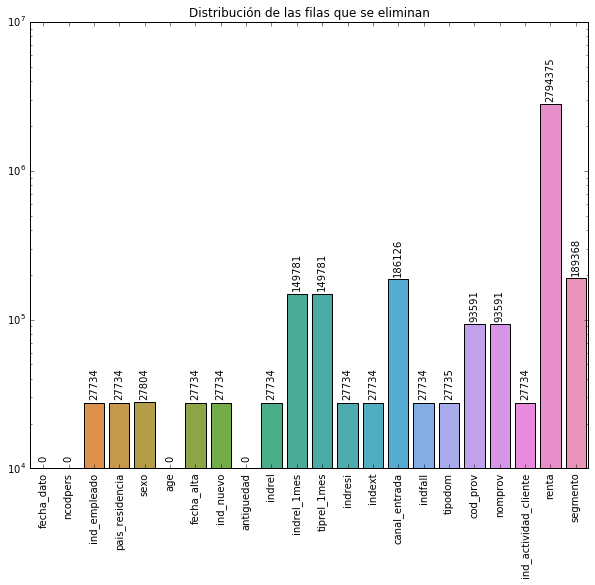

In [131]:
missing_count_bycolumn = [np.sum(missing[col].isnull()) for col in (missing.columns[:22])]
    
plt.figure(figsize=(10,8))
graph = sns.barplot(missing.columns[:22], missing_count_bycolumn)
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.title('Distribución de las filas que se eliminan')

for i, col in enumerate(missing_count_bycolumn):
    graph.text(i, 10**4 + 1000 if col == 0 else col*1.04, col, va='bottom', ha='center', rotation='vertical')

In [79]:
print('Cantidad de filas a eliminar', len(missing_index))

Cantidad de filas a eliminar 2851917


In [132]:
df.drop(missing_index, inplace=True, axis=0)

In [133]:
df.shape

(10795392, 46)

Se revisan nuevamente la cantidad de registros por mes.

Se evidencia que los registros llegan a un máximo en el mes 10-2015 y ahí inicia un decrecimiento de los registros, esto por haber eliminado las filas con datos faltantes

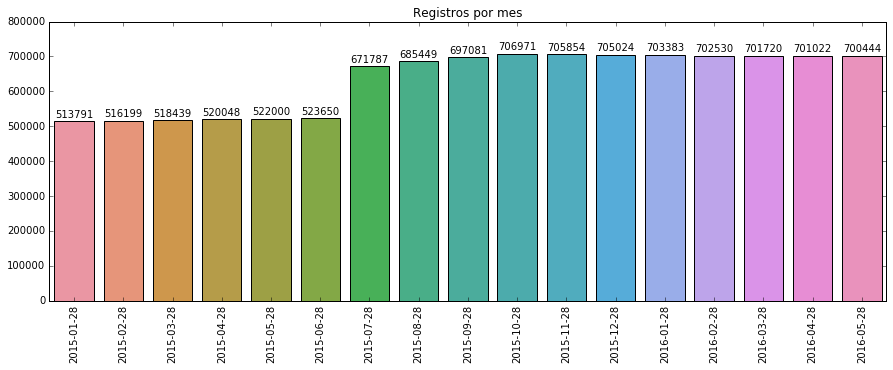

In [161]:
dates = df.fecha_dato.value_counts().sort_index()
fecha_dato = [str(date).split()[0] for date in dates.index]
count_dates = dates.values

plt.figure(figsize=(15, 5))
sns.barplot(fecha_dato, count_dates)
plt.xticks(rotation='vertical')
plt.title('Registros por mes')

for i, count in enumerate(count_dates):
    plt.text(i, count*1.01, count, ha='center', va='bottom')

* Se cambiaron de tipo de variable de `str` a `int64` en algunas columnas que contenían `NaN`

In [11]:
df.age = df.age.astype('int64')
df.ind_nuevo = df.ind_nuevo.astype('int64')
df.antiguedad = df.antiguedad.astype('int64')
df.indrel_1mes = df.indrel_1mes.astype('float64')

### Tratamiento de datos
* Estas son las columnas que tienen atributos categóricos y son los que se van a convertir a numéricos

In [12]:
cols = df.select_dtypes(['object']).columns
cols

Index(['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento'],
      dtype='object')

In [13]:
%%time
for col in cols:
    print(col, '¡LISTO!')
    attribute_vals = df[col].value_counts().index
    attribute_counts = np.arange(1, len(attribute_vals) + 1)
    df.replace(attribute_vals, attribute_counts, inplace=True)

ind_empleado ¡LISTO!
pais_residencia ¡LISTO!
sexo ¡LISTO!
tiprel_1mes ¡LISTO!
indresi ¡LISTO!
indext ¡LISTO!
canal_entrada ¡LISTO!
indfall ¡LISTO!
nomprov ¡LISTO!
segmento ¡LISTO!
CPU times: user 2h 13min 56s, sys: 2min 20s, total: 2h 16min 17s
Wall time: 2h 16min 10s


* Se hizo la división de la fecha en tres columnas, año, mes y día. Los dos atributos que son tipo fecha son:
    * fecha_dato
    * fecha_alta

In [ ]:
df['fecha_dato_year'] = df.fecha_dato.dt.year
df['fecha_dato_month'] = df.fecha_dato.dt.month
df['fecha_dato_day'] = df.fecha_dato.dt.day

df['fecha_alta_year'] = df.fecha_alta.dt.year
df['fecha_alta_month'] = df.fecha_alta.dt.month
df['fecha_alta_day'] = df.fecha_alta.dt.day

* Se reordenaron las nuevas columnas

In [53]:
df_cols = df.columns.tolist()
df_cols_reordered = df_cols[:1] + df_cols[46:49] + df_cols[1:7] + df_cols[49:52] + df_cols[8:46]

In [54]:
df = df[df_cols_reordered]
df.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,2015,1,28,1050611,1,1,1,23,2012-08-10,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,2015,1,28,1050612,1,1,1,23,2012-08-10,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,2015,1,28,1050613,1,1,1,22,2012-08-10,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,2015,1,28,1050615,1,1,1,23,2012-08-10,...,0,0,0,0,0,0,0,0.0,0.0,0


### *Labels*
Se separarán los labels o targets en otro dataset, para dejar solamente los atributos necesarios para el entrenamiento

In [ ]:
labels = df.iloc[:, 20:]

labels.shape

%%time
labels.to_csv('data/clean/train_labels.csv', index=False)

In [32]:
labels.shape

(10795392, 24)

### Exportación del dataset
En esta segund versión, que será la que se usará en la mayoría de casos para el entrenamiento de los algoritmos, se van a remover los *labels*

In [17]:
%%time
df.to_csv('data/clean/train_clean_v2.csv', index=False)

CPU times: user 5min 45s, sys: 1.16 s, total: 5min 46s
Wall time: 5min 54s


### *Targets* o *Labels* II
En esta segunda sección de los *targets* se separan en diferentes archivos

In [3]:
df_labels = pd.read_csv('data/clean/train_labels.csv')
df_labels.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
